In [1]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Reading the data
data = pd.read_csv('heart.csv', header=None, delimiter=' ')

In [3]:
# Describing the data
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [4]:
# First few entries of the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [5]:
# Checking for empty data fields
flag=data.isnull().values.any()
if(flag):
  print("The data set contains empty field")
else:
  print("The data set does'nt contain any empty field")

The data set does'nt contain any empty field


In [6]:
# Splitting the data into train and test set
X=data.iloc[:,0:13]
y=data.iloc[:,13]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [7]:
# Mean Normalizing the data 
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)
y_test=np.array(y_test)
y_train=np.array(y_train)

**METHOD 1 - Using Sci-kit Learn Library**

In [8]:
# Creating and fitting the classifier
cf = KNeighborsClassifier(n_neighbors=3)
cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
# Testing the accuracy of the fitted model
y_pred=cf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7037037037037037

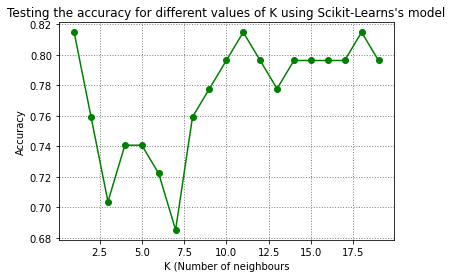

In [10]:
# Varying k and finding results
accuracy_array = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_prediction = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_prediction)
    accuracy_array.append(accuracy)
plt.grid(color='grey', linestyle=':', linewidth=1)
plt.plot(range(1, 20), accuracy_array, color='green', marker='o')
plt.xlabel('K (Number of neighbours')
plt.ylabel('Accuracy')
plt.title("Testing the accuracy for different values of K using Scikit-Learns's model")
plt.show()

In [11]:
# Printing the confusion matrix
print("The confusion matrix for Scikit-Learn's model is ")
print(confusion_matrix(y_test,y_prediction))

The confusion matrix for Scikit-Learn's model is 
[[25  5]
 [ 6 18]]


**METHOD 2 - Writing the algorithm manually**

In [12]:
# Writing the eucledian distance function
def euclideanDistance(data1, data2):
    distance = 0
    for x in range(len(data1)):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

In [13]:
# Defining the get_neighbours function
def get_neighbours(train, test_row, num_neighbours):
	distances=[]
	for x in range(len(train)):
		dist = euclideanDistance(test_row, train[x])
		distances.append((x, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbours=[]
	for i in range(num_neighbours):
		neighbours.append(distances[i][0])
	return neighbours

In [14]:
# Defining the predic_classification function
def predict_classification(train,y_train,test_row,num_neighbours):
	neighbours = get_neighbours(train, test_row, num_neighbours)
	output_values = [y_train[x] for x in neighbours]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [15]:
# Predicting the values for k=3
y_pred_manual=[]
ctr=1
for test in X_test:
  y_pred_manual.append(predict_classification(X_train,y_train,test,3))
y_pred_manual=np.array(y_pred_manual)
accuracy_score(y_test,y_pred_manual)

0.7037037037037037

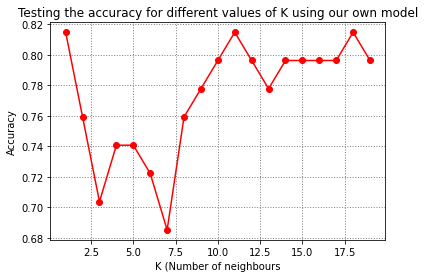

In [16]:
# Plotting the graph of accuracy with variation in k
accuracy_array_manual = []
for k in range(1, 20):
  y_prediction_manual=[]
  ctr=1
  for test in X_test:
    y_prediction_manual.append(predict_classification(X_train,y_train,test,k))
  y_prediction_manual=np.array(y_pred_manual)
  accuracy = accuracy_score(y_test, y_prediction_manual)
  accuracy_array_manual.append(accuracy)
plt.grid(color='grey', linestyle=':', linewidth=1)
plt.plot(range(1, 20), accuracy_array, color='red', marker='o')
plt.xlabel('K (Number of neighbours')
plt.ylabel('Accuracy')
plt.title('Testing the accuracy for different values of K using our own model')
plt.show()

In [17]:
# Printing the confusion matrix
print("The confusion matrix for our manually written algo is ")
print(confusion_matrix(y_test,y_pred_manual))

The confusion matrix for our manually written algo is 
[[20 10]
 [ 6 18]]


As we can see that both the graphs are approximately same, hence our manually written algorithm is working well